# Credit Card Fraud Detection

**Problem Statement**

1.Build a machine learning model to identify fradulent credit card transactions.

2.Preprocess and normalize the transaction data, handle class inbalance issues, and split the dataset into training and testing sets.

3.Train a classification algorithm,such as logistic regression or random forests to classify transactions as fraudelent or genuine.

4.Evaluate the model's performance using metrics like precision, recall, and f1-score and cosider techniques like oversampling for improving results.

### Data Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# Importig the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Data loading

In [2]:
# loding the dataset
data = pd.read_csv('creditcard.csv',encoding =('ISO-8859-1'),low_memory =False)

In [3]:
# Shows first 5 rows of dataframe
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Pre-processing

In [4]:
# To check number of rows and columns
data.shape
print("Rows = ",data.shape[0])
print("Columns = ",data.shape[1])

Rows =  284807
Columns =  31


In [5]:
# To get infomation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Describe data
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [7]:
# Show columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Checking missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Feature Scaling

In [9]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
data.shape

(284807, 31)

In [13]:
# Cheack Dublicated values
data.duplicated().any()

True

In [14]:
# Remove Dublicate values 
data = data.drop_duplicates()

In [15]:
data.shape

(283726, 31)

In [16]:
# Separating features and Target
X = data.drop('Class',axis=1)
y = data['Class']

In [17]:
X.shape

(283726, 30)

In [18]:
y.shape

(283726,)

In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Use SMOTE to oversample the data
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [21]:
y_resampled.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

### Spliting training and test data

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.20,
                                                 random_state=42)

## Model Training

### Logistic Regression

In [23]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred1 = log.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred1)

0.9701593970097615

In [26]:
precision_score(y_test, y_pred1)

0.9794267470225283

In [27]:
recall_score(y_test,y_pred1)

0.960696000985239

In [28]:
f1_score(y_test,y_pred1)

0.969970956826034

### Decision Tree Classifier

In [29]:
# Instantiate a DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred2 = dt.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred2)

0.9984201514536372

In [32]:
precision_score(y_test,y_pred2)

0.997803549464066

In [33]:
recall_score(y_test,y_pred2)

0.9990499480990165

In [34]:
f1_score(y_test,y_pred2)

0.998426359792174

### Random Forest Classifier

In [35]:
# Instantiate a RandomForestClassifier
rf = RandomForestClassifier()

# Fit the Random Forest classifier to the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred3 = rf.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.9999029143351397

In [38]:
precision_score(y_test,y_pred3)

0.999806508355321

In [39]:
recall_score(y_test,y_pred3)

1.0

In [40]:
f1_score(y_test,y_pred3)

0.9999032448170009

In [41]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [42]:
final_data

,Models,ACC
0,LR,97.015940
1,DT,99.842015
2,RF,99.990291


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

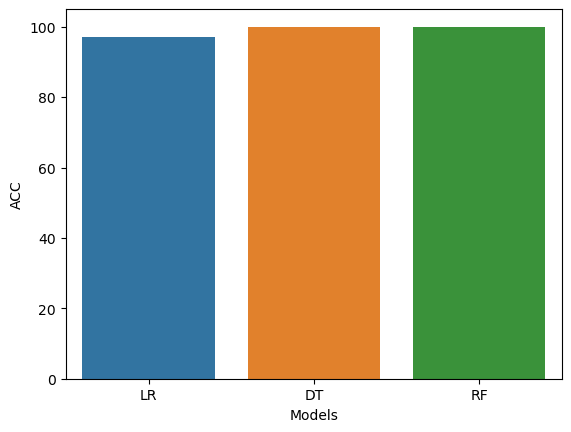

In [43]:
sns.barplot(final_data['Models'],final_data['ACC'])

### Conclusion

The Random Forest algorithm is likely to be a  good model for the given problem to classify transactions as fraudulent or genuine. It has evaluated the model's performance using metrics like precision, recall,and F1-score, and considered techniques like oversampling for improving results.